In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

warnings.filterwarnings('ignore')
%matplotlib inline


# 필요 함수 정의

In [152]:
# 경향성이 있는 그래프의 선형적으로 증가할 수 있게 하는 함수 
def trend(time, slope = 0):
    return time * slope

# x: 시간축인 함수 plot 함수
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

# 120개씩 자르는 함수 
def univariate_data(dataset, start_index, end_index):
    data = []
    history_size = 120
    start_index = start_index + history_size


    for i in range(start_index, end_index, 120): # 0
        indices = range(i - history_size, i) # [0 - 120] , [120 - 240] ...
        # Reshape data from (history_size,) to (history_size, 1)

        data.append(dataset[indices])

    return np.array(data)

group_idx : 1시간마다 자른 데이터의 평균을 정리한 데이터프레임, index : 716

df_idx_tmp : 하나의 구간의 모든 데이터를 가지고 있는 데이터프레임, index : 8592

df_temp_idx : temp 데이터만을 120개씩 잘라서 모아 놓은 데이터

## 10-15

In [206]:
for i in range(1,9):
    globals()['df_'+str(i) ]= pd.read_csv('./temperature_csv_file/temp_df_{}.csv'.format(i), encoding = 'cp949')

df_all = pd.concat([df_1, df_2], axis = 0)
df_all = pd.concat([df_all, df_3], axis = 0)
df_all = pd.concat([df_all, df_4], axis = 0)
df_all = pd.concat([df_all, df_5], axis = 0)
df_all = pd.concat([df_all, df_6], axis = 0)
df_all = pd.concat([df_all, df_7], axis = 0)
df_all = pd.concat([df_all, df_8], axis = 0)

df_all = df_all[:601800].reset_index().drop(columns = ['index'], axis = 0)

for i in range(1,8):
    globals()['df_'+str(i)+'_tmp'] = df_all[85920*(i-1):85920*i].reset_index().drop(columns=['index'], axis=0)


for i in range(1,8):
    mean = globals()['df_'+str(i)+'_tmp']['TEMP'].mean()
    diff  = 261.7292228119181 - mean
    globals()['df_'+str(i)+'_tmp']['TEMP'] += diff

for i in range(8,12):
    globals()['df_'+str(i)+'_tmp'] = globals()['df_'+str(i-5)+'_tmp'].copy()

N = 6
dx = (600 - df_1_tmp['TEMP'].mean()) / N # 전체 데이터에 대한 증가율 : 56.3785
dx_minute = dx / (len(df_1_tmp)-1) # 분당 증가율

time = np.arange(85920)
slope = dx_minute * 2

def trend(time, slope = 0):
    return time * slope

for i in range(2,12):
    series = np.round(trend(time, slope = slope) + globals()['df_'+str(i)+'_tmp']['TEMP'] + dx*(i-2), 3)
    globals()['df_'+str(i)+'_tmp']['TEMP'] = series


univariate_past_history = 120

for i in range(1,12):
    data = {'Group' : [], 'batch_num' : [], 'TEMP' : [], }

    for j in range(716):
        MEAN = np.round(globals()['df_'+str(i)+'_tmp']['TEMP'][120*j:120*(j+1)].mean(),3)
        data['Group'].append(i)
        data['batch_num'].append(j+1)
        data['TEMP'].append(MEAN)

    globals()['group_'+str(i)] = pd.DataFrame(data)

TIME = pd.DataFrame({'TIME' : np.arange(7876)})
tmp = pd.concat([group_1, group_2], axis = 0)
tmp = pd.concat([tmp, group_3], axis = 0)
tmp = pd.concat([tmp, group_4], axis = 0)
tmp = pd.concat([tmp, group_5], axis = 0)
tmp = pd.concat([tmp, group_6], axis = 0)
tmp = pd.concat([tmp, group_7], axis = 0)
tmp = pd.concat([tmp, group_8], axis = 0)
tmp = pd.concat([tmp, group_9], axis = 0)
tmp = pd.concat([tmp, group_10], axis = 0)
tmp = pd.concat([tmp, group_11], axis = 0)
tmp = tmp.reset_index()
tmp = pd.concat([tmp, TIME], axis = 1)
tmp.drop(columns = 'index', inplace = True)
df = tmp

for i in range(1,12):
    globals()['df_temp_'+str(i)] = univariate_data(globals()['df_'+str(i)+'_tmp']['TEMP'], 0, len(df_1_tmp)+1)

In [210]:
df

,Group,batch_num,TEMP,TIME
0,1,1,284.192,0
1,1,2,284.353,1
2,1,3,285.276,2
3,1,4,285.589,3
4,1,5,285.146,4
...,...,...,...,...
7871,11,712,931.874,7871
7872,11,713,933.001,7872
7873,11,714,933.236,7873
7874,11,715,933.649,7874


In [207]:
group_2

,Group,batch_num,TEMP
0,2,1,334.637
1,2,2,342.034
2,2,3,335.760
3,2,4,333.979
4,2,5,333.084
...,...,...,...
711,2,712,446.048
712,2,713,446.611
713,2,714,446.537
714,2,715,445.991


In [208]:
df_2_tmp

,date,kst,TEMP
0,20230131,5:03,334.268
1,20230131,5:03,334.245
2,20230131,5:04,334.311
3,20230131,5:04,334.320
4,20230131,5:05,334.374
...,...,...,...
85915,20230302,1:00,446.969
85916,20230302,1:01,446.700
85917,20230302,1:01,446.736
85918,20230302,1:02,446.810


In [209]:
df_temp_2

array([[334.268, 334.245, 334.311, ..., 334.494, 334.444, 334.485],
       [334.386, 334.411, 334.374, ..., 345.01 , 347.482, 350.737],
       [352.769, 352.201, 351.157, ..., 334.531, 334.476, 334.56 ],
       ...,
       [447.653, 447.697, 447.242, ..., 445.177, 445.948, 446.352],
       [446.019, 446.451, 446.823, ..., 446.125, 446.174, 446.379],
       [445.417, 445.156, 444.489, ..., 446.736, 446.81 , 446.945]])

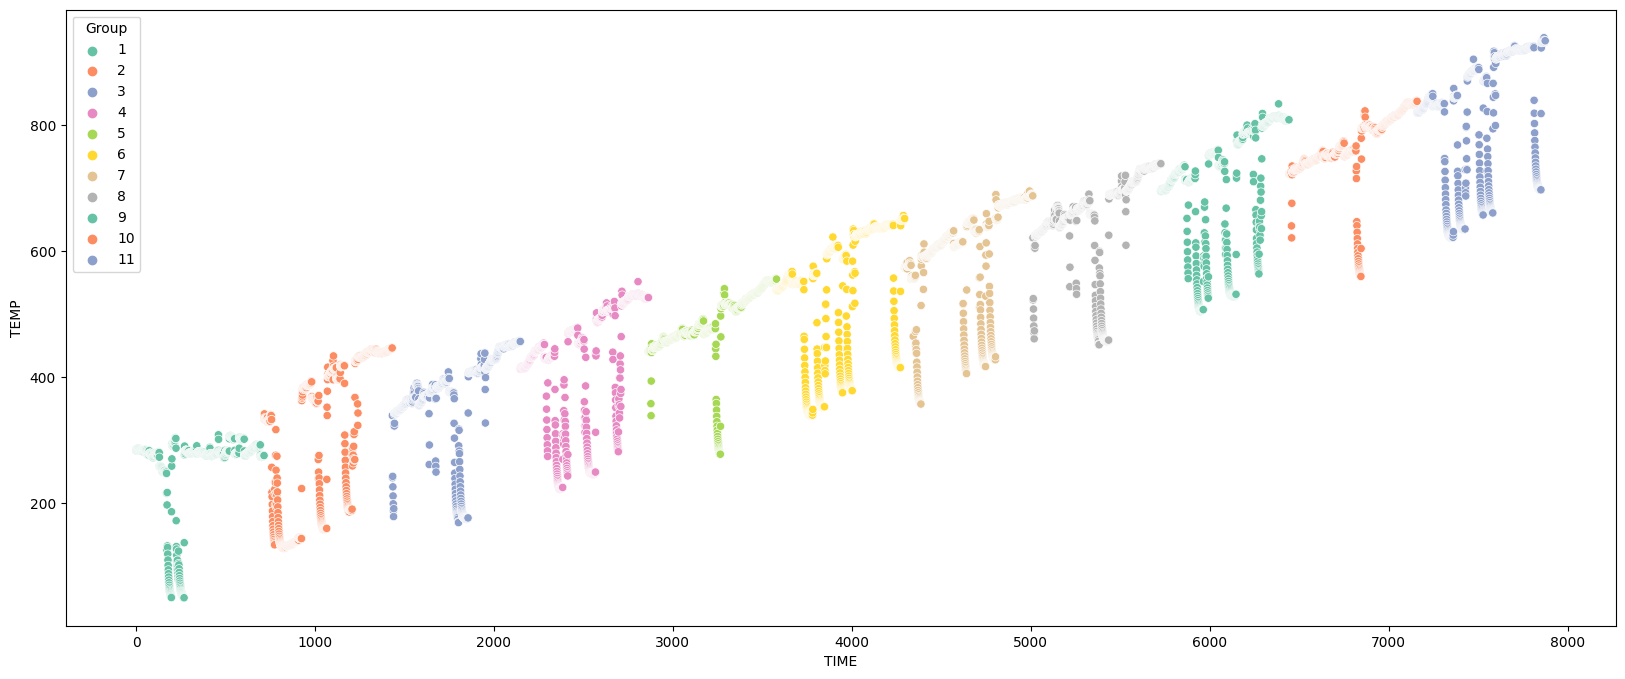

In [183]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = 'TIME', y = 'TEMP', data = df, hue='Group', palette='Set2')
plt.show()

# Machine Learning 적용

In [214]:
from sklearn.model_selection import train_test_split

X = df['TEMP']
y = df['Group']

In [215]:
X, y

(0       284.192
 1       284.353
 2       285.276
 3       285.589
 4       285.146
          ...   
 7871    931.874
 7872    933.001
 7873    933.236
 7874    933.649
 7875    933.682
 Name: TEMP, Length: 7876, dtype: float64,
 0        1
 1        1
 2        1
 3        1
 4        1
         ..
 7871    11
 7872    11
 7873    11
 7874    11
 7875    11
 Name: Group, Length: 7876, dtype: int64)

# 10-15 경계선##############